In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seatsvotes

In [9]:
house = seatsvotes.data.congress(geo=True)
house = house.query('year in (2000,2002,2004,2006,2008)')

In [10]:
house['district_id'] = house.contest_ui.apply(lambda x: x[3:])

In [19]:
succ = seatsvotes.Successive(house, covariate_columns=['inc'],
                             uncontested='censor',
                             weight_column='turnout', missing='impute')

/home/lw17329/Dropbox/dissert/dev/seatsvotes/seatsvotes/utils.py:143: UserWarning: computing redistricting from years vector
  warn('computing redistricting from years vector')
/home/lw17329/anaconda/envs/ana/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
simulated = succ.simulate_elections(n_sims=1000)

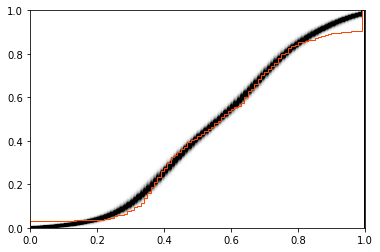

In [21]:
seatsvotes.plot.cdf_shroud(house.query('year == 2008').vote_share.values, 
                           simulated)